In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
sns.set(color_codes = True)
%matplotlib inline

df = pd.read_csv('data-titanic/train.csv')
df_original = df.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Cleaning and numerizing 
df_clean = df.copy()
df_clean['Age']=df['Age'].fillna(df['Age'].median())
df_clean.loc[df["Sex"] == "male", "Sex"] = 0
df_clean.loc[df["Sex"] == "female", "Sex"] = 1
df_clean.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
df_clean.loc[df["Embarked"] == "S", "Embarked"] = 0
df_clean.loc[df["Embarked"] == "C", "Embarked"] = 1
df_clean.loc[df["Embarked"] == "Q", "Embarked"] = 2
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# For finding out missing spots:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a106c7fd0>,
      dtype=object)

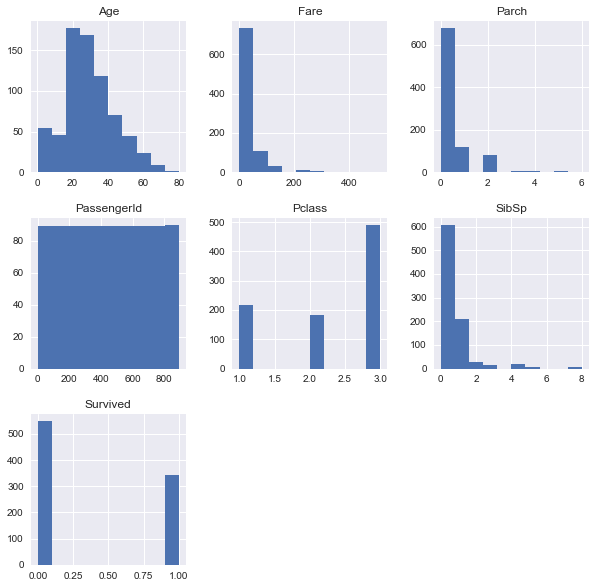

In [6]:
df.hist(figsize=(10,10))

In [7]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


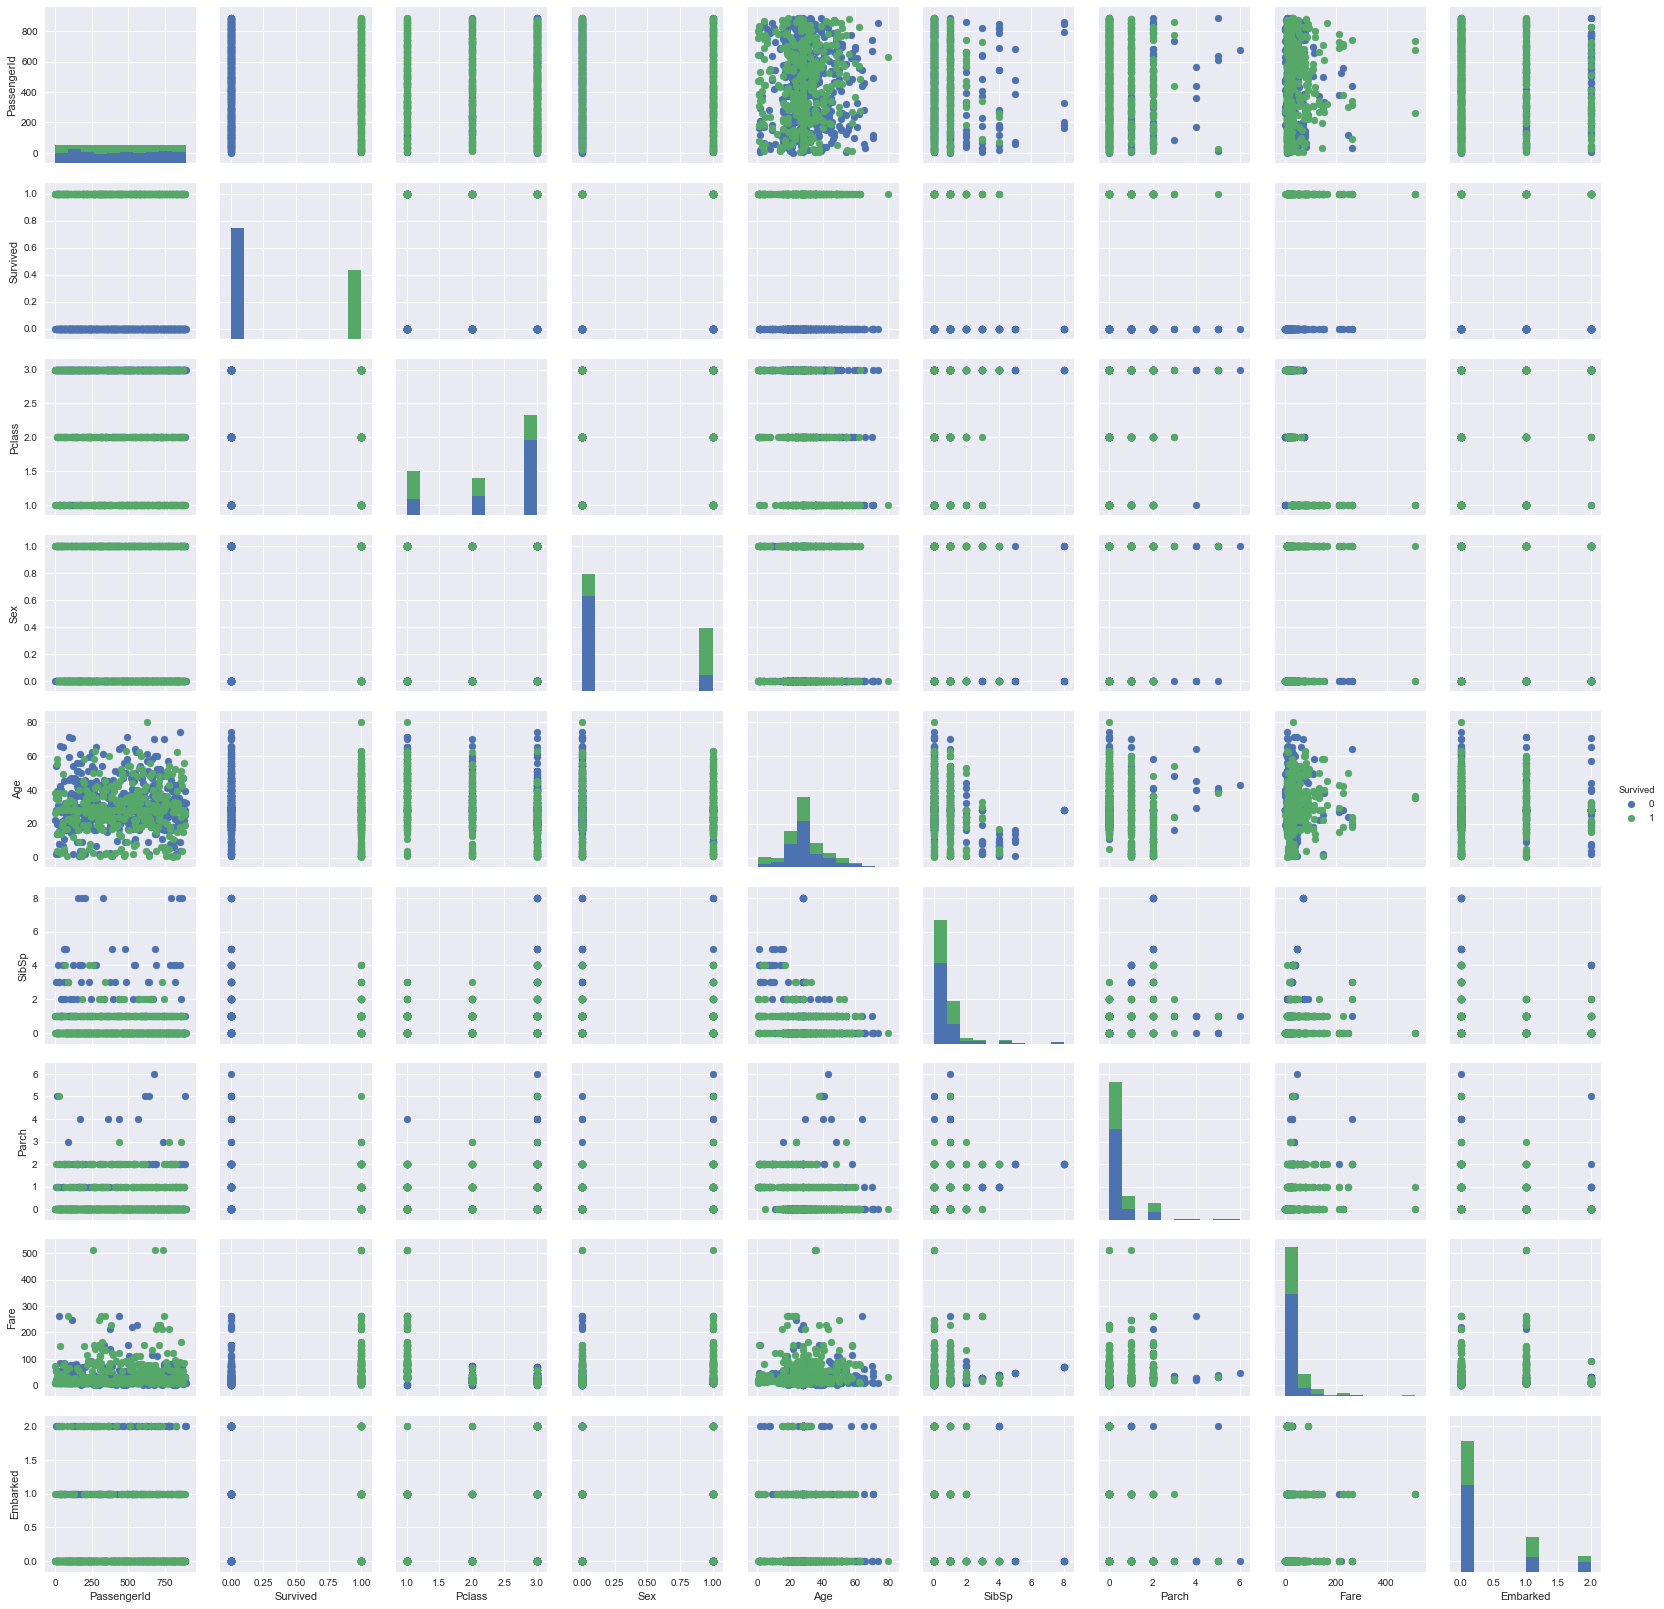

In [8]:
g=sns.PairGrid(df_clean, hue= "Survived")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

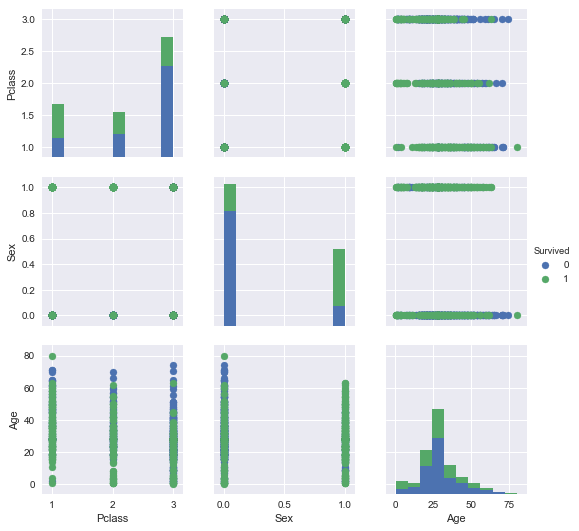

In [9]:
# PairGrid of variables
g = sns.PairGrid(df_clean, hue="Survived", vars=['Pclass', 'Sex', 'Age'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

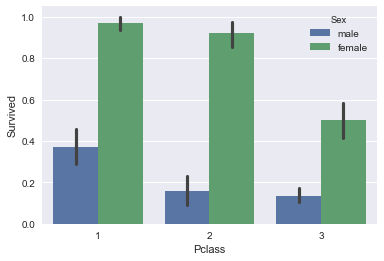

In [10]:
sns.barplot(x="Pclass", y='Survived', hue='Sex', data = df)

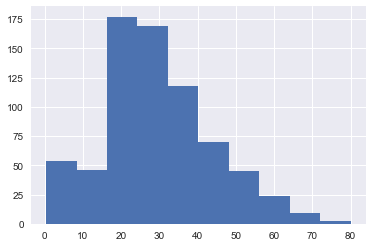

In [11]:
df['Age'].hist()

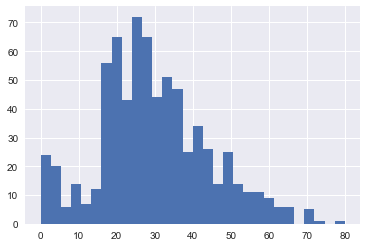

In [12]:
df['Age'].hist(bins=30, range =(0, df['Age'].max()))

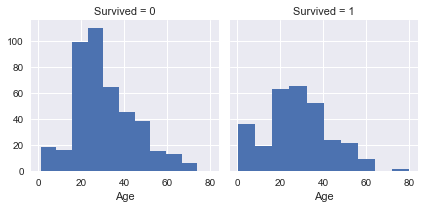

In [13]:
g=sns.FacetGrid(df, col='Survived')
g.map(plt.hist, "Age")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20951b00>,
      dtype=object)

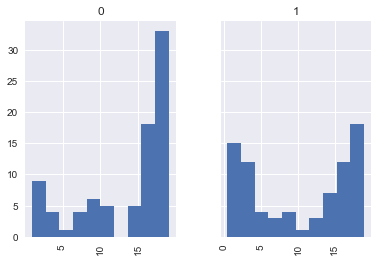

In [14]:
df[df.Age<20].hist(column='Age', by="Survived", sharey=True)

In [16]:
df.

Embarked
C    168
Q     77
S    644
dtype: int64

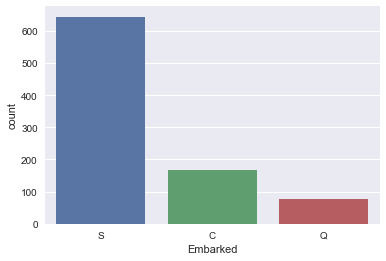

In [17]:
sns.countplot('Embarked', data=df)

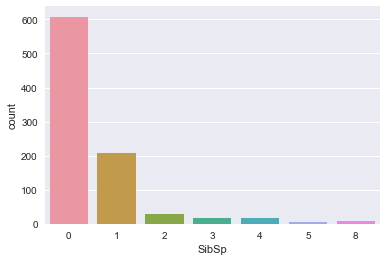

In [18]:
sns.countplot('SibSp', data=df)

In [19]:
df.groupby('SibSp').Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20c0e320>,
      dtype=object)

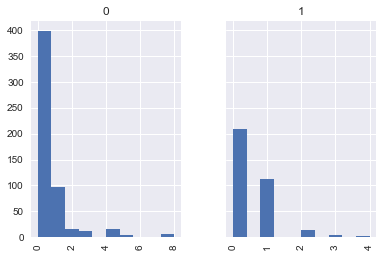

In [20]:
df.hist(column='SibSp', by='Survived', sharey=True)

In [23]:
df.groupby(['SibSp', 'Sex']).Survived.mean()

SibSp  Sex   
0      female    0.787356
       male      0.168203
1      female    0.754717
       male      0.310680
2      female    0.769231
       male      0.200000
3      female    0.363636
       male      0.000000
4      female    0.333333
       male      0.083333
5      female    0.000000
       male      0.000000
8      female    0.000000
       male      0.000000
Name: Survived, dtype: float64

In [24]:
df.groupby(['SibSp', 'Pclass']).size()

SibSp  Pclass
0      1         137
       2         120
       3         351
1      1          71
       2          55
       3          83
2      1           5
       2           8
       3          15
3      1           3
       2           1
       3          12
4      3          18
5      3           5
8      3           7
dtype: int64

In [25]:
df['AgeFilled']=df['Age'].fillna(df['Age'].median())
df['AgeFilled'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: AgeFilled, dtype: float64